# Maps and Cartography

This build demonstrates how to use Jupyter notebooks to work with geographical objects and create and display a wide range of maps, from static, publication quality maps to interactive web based maps.

See [here](https://github.com/OpenGeoscience/geonotebook) ([docs](https://github.com/OpenGeoscience/geonotebook)) for an example of the `OpenGeoscience/geonotebook` package which provides a more elaborate environment for worjing with geo-data in a notebook context.

For examples of astronomical maps, see the [`showntell/astronomy` branch](https://github.com/psychemedia/showntell/tree/astronomy).

To display all the generated cell output, from the noteboon *Cell* menu, select *Run All*.

The notebook may contain code cells with hidden inputs (that is, hidden code). To see the hidden input for a given cell, select the cell and click on the *Toggle selected cell input dissplay* button on the toolbar. To hide/reveal all code, toggle the *Hide/Show codecell inputs* button.

## Working with Geo-Data

## Interactive Maps

Jupyter notebooks provide a natural home for embedded, interactive maps.

A wide range of Python packages exist that support the creation and embedding of interactive maps built from third party mapping services such as Google Maps, Bing Maps, and OpenStreetMap (OSM).

Packages can also work with tiles served from a personally hosted map tile server.

### `ipyleaflet`

The `ipyleaflet` package supports the creation of embedded, interactive maps using the `leaflet.js` Javascript package. 

In [1]:
import ipyleaflet as lflt

m = lflt.Map(center=[52.0250, -0.7084], zoom=14)
m

A Jupyter Widget

### `folium`

The `folium` package supports the creation and embedding of interactive maps from ...


#### Simple Maps

In [1]:
import folium


m = folium.Map(location=[52.0250, -0.7084], zoom_start=14)
m

In [1]:
%load_ext folium_magic

In [2]:
%folium_map

#### Adding Markers

In [21]:
m = folium.Map(location=[52.0250, -0.7084], zoom_start=14, tiles='Stamen Toner')

folium.Marker([52.0250, -0.7084],
              popup='Open University, Walton Hall').add_to(m)
m

In [4]:
%folium_map -m 52.0250,-0.7084,"My marker" -z 12

In [67]:
#We can accept all the following variants to get a marker in a map
markers=[[52.0250, -0.7084,'Open University, Walton Hall'], [52., -0.7,'Open University, Walton Hall']]
markers=[52.0250, -0.7084,'Open University, Walton Hall']
markers=[{'lat':52.0250, 'lng':-0.7084,'popup':'Open University, Walton Hall'},
        {'lat':52.0, 'lng':-0.70,'popup':'Open University, Walton Hall'}]
markers={'lat':52.0250, 'lng':-0.7084,'popup':'Open University, Walton Hall'}

In [68]:
%folium_map  -m markers

#### Adding Boundaries to Maps

Boundaries represented using a `.geojson` file can be rendered as an overlayed map layer.

In [100]:
import os
m = folium.Map( location=[52.0250, -0.7084], zoom_start=9 )

#Path to geojson file
mk = os.path.join('boundaries', 'mk.json')

#Add geojson layer to map
folium.GeoJson( mk, name='geojson' ).add_to(m)

m

In [105]:
%folium_map -j boundaries/mk.json

#### Choropleth Maps

#### Generating Static Images from `folium` Created Maps

## Static Maps

Whilst interactive maps provide a wide range of benefits, sometimes you need to create a fixed, or *static* map, of high quality, for print publication.

Python supports a range of packages that can be used to create such maps, including:

- `basemap`, which is supplied as part of `matplotlib`;
- `cartopy`, a cartogaphic package originally developed by the UK Met Office.

### `basemap`

Examples from: https://matplotlib.org/basemap/users/geography.html

In [4]:
%matplotlib inline

Simple map of coastal outline:

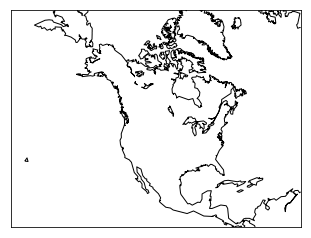

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
plt.show()

Add colour:

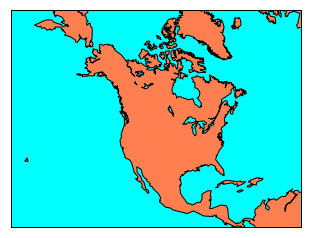

In [6]:
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
plt.show()

Show map with relief (the rendering process may take some time to run):

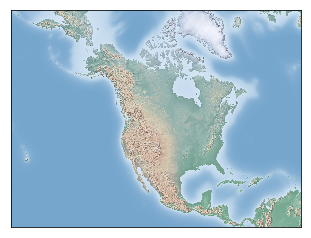

In [7]:
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.shadedrelief()
plt.show()

### Example showing interactive exploration of map projections

Via https://gist.github.com/deeplook/f5d02b79b6a64eecb52192d2d6048c16

In [8]:
#ish via https://gist.github.com/deeplook/f5d02b79b6a64eecb52192d2d6048c16
from ipywidgets import interact, interact_manual, FloatSlider, Checkbox
from mpl_toolkits.basemap import Basemap, supported_projections

import datetime
import numpy as np
import matplotlib.pyplot as plt

lines = supported_projections.strip().split('\n')
proj_names = [line.strip().split()[0] for line in lines]

lat_slider = FloatSlider(min=-90, max=90, step=0.1, continuous_update=False)
lon_slider = FloatSlider(min=-180, max=180, step=0.1, continuous_update=False)
hour_slider = FloatSlider(min=-12, max=12, step=1/60, continuous_update=False)
shadow_checkbox = Checkbox(value=False, description='Shadow',disabled=False)

@interact_manual(lat_0=lat_slider, lon_0=lon_slider, delta_hours=hour_slider,
                 shadow=shadow_checkbox, projection=proj_names, title='Demo Map')
def show_map(lat_0=0, lon_0=0, delta_hours=0,shadow=False, projection='mill', title=''):
    "Show a world map."
    
    # Resolutions: c (crude), l (low), i (intermediate), h (high), f (full) or None. 
    map = Basemap(projection=projection, lat_0=lat_0, lon_0=lon_0, resolution='c')

    # Plot coastlines, draw label meridians and parallels.
    map.drawcoastlines() # linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)

    # Plot countries.
    map.drawcountries() # linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)

    # Plot parallels and meridians.
    map.drawparallels(np.arange(-90, 90, 30), labels=[1, 0, 0, 0])
    map.drawmeridians(np.arange(map.lonmin, map.lonmax + 30, 60), labels=[0, 0, 0, 1])
    
    # Fill continents 'coral' (with zorder=0), color wet areas 'aqua'
    map.drawmapboundary(fill_color='aqua')
    map.fillcontinents(color='coral', lake_color='aqua')
    
    if shadow:
        # Shade the night areas, with alpha transparency so the
        # map shows through. Use current time in UTC + delta.
        date = datetime.datetime.utcnow().timestamp() + delta_hours * 3600
        date = datetime.datetime.fromtimestamp(date)
        map.nightshade(date, alpha=0.35)
        title='{} {} (UTC)'.format(title, date.isoformat()[:19])
        
    plt.title(title)
    plt.show()

A Jupyter Widget

### `cartopy`

Examples from: http://scitools.org.uk/cartopy/docs/v0.13/matplotlib/advanced_plotting.html

/srv/venv/lib/python3.5/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


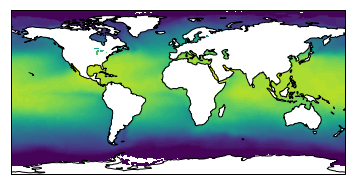

In [9]:
import os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import numpy as np

from cartopy import config
import cartopy.crs as ccrs


# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'netcdf', 'HadISST1_SST_update.nc'
                     )

dataset = netcdf_dataset(fname)
sst = dataset.variables['sst'][0, :, :]
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, sst, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

/srv/venv/lib/python3.5/site-packages/matplotlib/ticker.py:1856: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'
/srv/venv/lib/python3.5/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/srv/venv/lib/python3.5/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


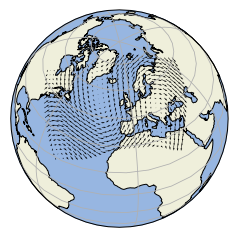

In [10]:
import matplotlib.pyplot as plt
import numpy as np

import cartopy
import cartopy.crs as ccrs


def sample_data(shape=(20, 30)):
    """
    Returns ``(x, y, u, v, crs)`` of some vector data
    computed mathematically. The returned crs will be a rotated
    pole CRS, meaning that the vectors will be unevenly spaced in
    regular PlateCarree space.

    """
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v, crs



ax = plt.axes(projection=ccrs.Orthographic(-10, 45))

ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.set_global()
ax.gridlines()

x, y, u, v, vector_crs = sample_data()
ax.quiver(x, y, u, v, transform=vector_crs)

plt.show()

/srv/venv/lib/python3.5/site-packages/cartopy/io/__init__.py:264: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


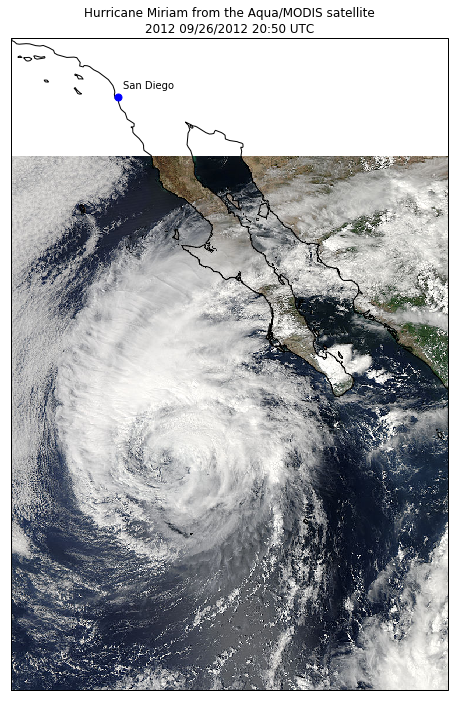

In [11]:
import os
import matplotlib.pyplot as plt

from cartopy import config
import cartopy.crs as ccrs


fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'sample', 'Miriam.A2012270.2050.2km.jpg'
                     )
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Hurricane Miriam from the Aqua/MODIS satellite\n'
          '2012 09/26/2012 20:50 UTC')

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

plt.show()

### choropleth demo

shapefiles uk - https://data.gov.uk/dataset/regions-december-2016-full-extent-boundaries-in-england2

Also - ONS Geogpraphy portal?

In [12]:
#https://speakerdeck.com/alinagator/plotting-choropleth-maps-with-cartopy-at-pydata-london
import cartopy.crs as ccrs

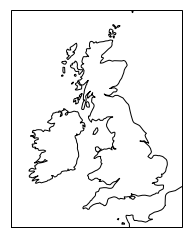

In [13]:
ax=plt.axes(projection=ccrs.GOOGLE_MERCATOR)
ax.coastlines(resolution='50m')
ax.set_extent([-12,3,49,60])

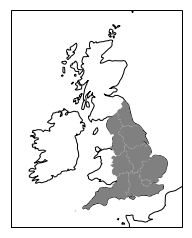

In [14]:
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
file = './boundaries/Regions_December_2016_Full_Extent_Boundaries_in_England/Regions_December_2016_Full_Extent_Boundaries_in_England.shp'
ax = plt.axes(projection=ccrs.GOOGLE_MERCATOR)
ax.coastlines(resolution='50m')
ax.set_extent([-12, 3, 49, 60])
regions = ShapelyFeature(Reader(file).geometries(),
 ccrs.PlateCarree(),
 facecolor='grey')
ax.add_feature(regions)

In [18]:
'''import matplotlib
ax = plt.axes(projection=ccrs.GOOGLE_MERCATOR)
ax.coastlines(resolution='50m')
ax.set_extent([-12, 3, 49, 60])
norm = matplotlib.colors.Normalize(vmin=-6, vmax=4)
cmap = plt.cm.gray_r
for i, row in df.iterrows():
    region = ShapelyFeature(df['shape'][i],
    ccrs.PlateCarree(),
    facecolor=
    cmap(norm(df['dev'][i])),
    )
    ax.add_feature(region)'''

"import matplotlib\nax = plt.axes(projection=ccrs.GOOGLE_MERCATOR)\nax.coastlines(resolution='50m')\nax.set_extent([-12, 3, 49, 60])\nnorm = matplotlib.colors.Normalize(vmin=-6, vmax=4)\ncmap = plt.cm.gray_r\nfor i, row in df.iterrows():\n    region = ShapelyFeature(df['shape'][i],\n    ccrs.PlateCarree(),\n    facecolor=\n    cmap(norm(df['dev'][i])),\n    )\n    ax.add_feature(region)"

### Cartograms


In [ ]:
#https://github.com/LokiTechnologies/equalareacartogram
#pip install currently throws an error
#!pip3 install git+https://github.com/LokiTechnologies/EqualAreaCartogram.git